In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [5]:
df = pd.read_csv(r"C:\Users\khushi pawar\Downloads\train.csv",usecols=['Age','Fare','Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [10]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [11]:
df['Age'].isnull().sum()

0

In [12]:
df['Age'].isnull().sum()

0

C:\Users\khushi pawar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'before')

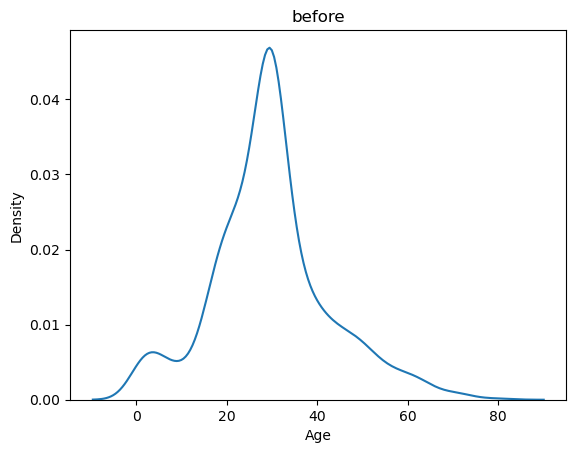

In [13]:
sns.kdeplot(x='Age',data=df)
plt.title('before')

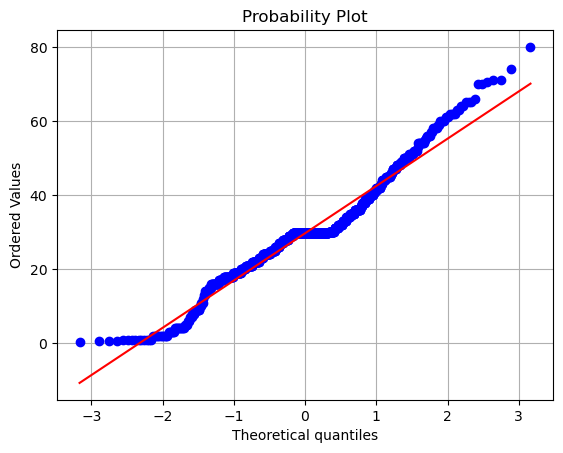

In [14]:
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.grid(True)
plt.show()


C:\Users\khushi pawar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Density'>

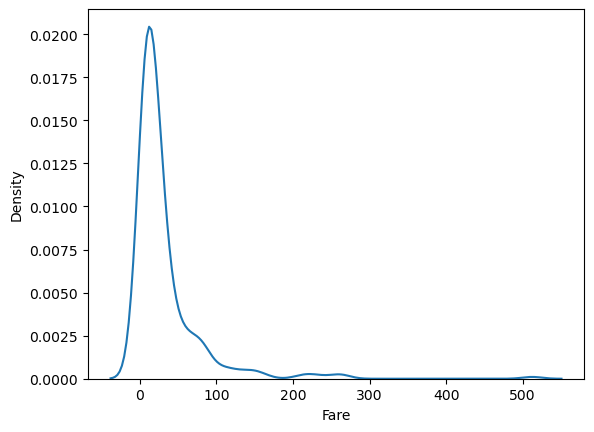

In [15]:
sns.kdeplot(x='Fare',data=df)

In [16]:
df['Fare'].isnull().sum()

0

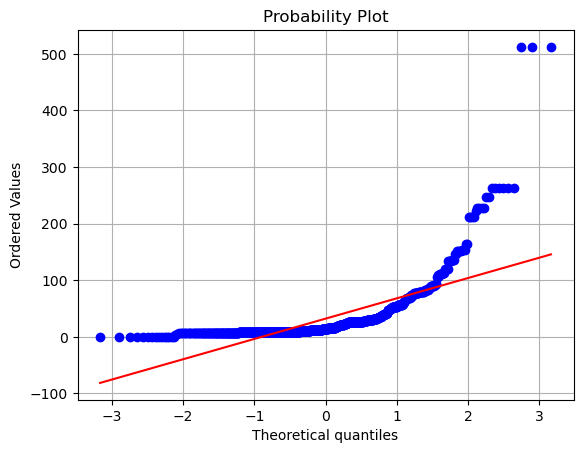

In [17]:
stats.probplot(df['Fare'],dist='norm',plot=plt)
plt.grid(True)
plt.show()

In [18]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


In [26]:
funtrf=FunctionTransformer(func=np.log1p)

transformed_train = funtrf.fit_transform(X_train)
transformed_test = funtrf.transform(X_test)


In [28]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(transformed_train,y_train)
clf2.fit(transformed_train,y_train)
    
y_pred = clf.predict(transformed_test)
y_pred1 = clf2.predict(transformed_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.664804469273743
